# import libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset

In [ ]:
df = pd.read_csv('/content/ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
df.shape

(17966, 9)

In [ ]:
print(df['transmission'].unique())
print(df['fuelType'].unique())

['Automatic' 'Manual' 'Semi-Auto']
['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


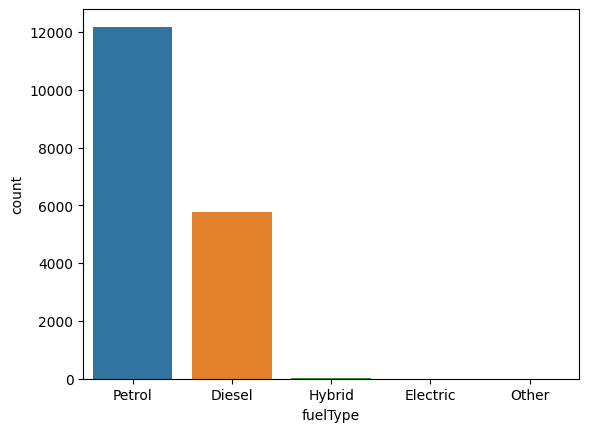

In [ ]:
df['fuelType'].value_counts()
sns.countplot(x='fuelType',data=df)
plt.show()


In [ ]:
df['transmission'] = df['transmission'].map({'Automatic':0,'Manual':1,'Semi-Auto':2})
df['fuelType'] = df['fuelType'].map({'Petrol':0,'Diesel':1,'Hybrid':2})

In [ ]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,0,15944,0.0,150,57.7,1.0
1,Focus,2018,14000,1,9083,0.0,150,57.7,1.0
2,Focus,2017,13000,1,12456,0.0,150,57.7,1.0
3,Fiesta,2019,17500,1,10460,0.0,145,40.3,1.5
4,Fiesta,2019,16500,0,1482,0.0,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,1,16700,0.0,150,47.1,1.4
17962,B-MAX,2014,7499,1,40700,0.0,30,57.7,1.0
17963,Focus,2015,9999,1,7010,1.0,20,67.3,1.6
17964,KA,2018,8299,1,5007,0.0,145,57.7,1.2


# splitting data

In [ ]:
x = df.drop(['model','year'],axis = 1)
y = df['year']
x

,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,12000,0,15944,0.0,150,57.7,1.0
1,14000,1,9083,0.0,150,57.7,1.0
2,13000,1,12456,0.0,150,57.7,1.0
3,17500,1,10460,0.0,145,40.3,1.5
4,16500,0,1482,0.0,145,48.7,1.0
...,...,...,...,...,...,...,...
17961,8999,1,16700,0.0,150,47.1,1.4
17962,7499,1,40700,0.0,30,57.7,1.0
17963,9999,1,7010,1.0,20,67.3,1.6
17964,8299,1,5007,0.0,145,57.7,1.2


<ipython-input-89-7bfde3fe80cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),fmt='.2f',annot = True)


<Axes: >

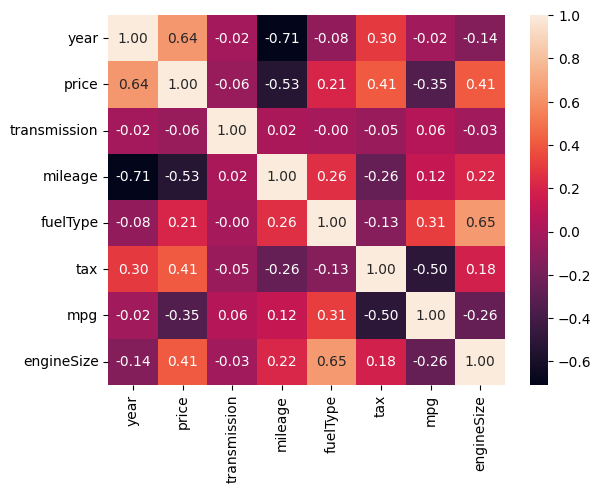

In [ ]:
sns.heatmap(df.corr(),fmt='.2f',annot = True)

# standarization

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [ ]:
standarization_x = scaler.transform(x)
standarization_x

array([[-0.05895852, -2.67003231, -0.38099808, ...,  0.59135805,
        -0.02044162, -0.81138621],
       [ 0.36287457,  0.04135139, -0.73335899, ...,  0.59135805,
        -0.02044162, -0.81138621],
       [ 0.15195802,  0.04135139, -0.56013157, ...,  0.59135805,
        -0.02044162, -0.81138621],
       ...,
       [-0.48100253,  0.04135139, -0.83982222, ..., -1.50505332,
         0.92766777,  0.57636151],
       [-0.83956066,  0.04135139, -0.94269045, ...,  0.51072684,
        -0.02044162, -0.34880364],
       [-0.83956066,  0.04135139, -0.94269045, ..., -1.47280084,
        -0.02044162, -0.81138621]])

In [ ]:
X = standarization_x
y = df['price']

# split data

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)


(16169, 7)
(1797, 7)


In [ ]:
print(y_train.shape)
print(len(y_test))

(16169,)
1797


# importing regression libraries

In [ ]:
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
xgb_model = XGBRegressor()

In [ ]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# importing metrics & R2 Score library


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


# model evaluation

In [ ]:
# training data evaluation
train_data_pred = xgb_model.predict(X_train)

#R2 score on training data
train_score = metrics.r2_score(y_train,train_data_pred)

#mean absolute error
mae = metrics.mean_absolute_error(y_train,train_data_pred)

print("R2 Training data score:",train_score)
print("Mean absolute error on training data score:",mae)


R2 Training data score: 0.9999943093769058
Mean absolute error on training data score: 6.986038799711737


In [ ]:
# training data evaluation
test_data_pred = xgb_model.predict(X_test)

#R2 score on training data
test_score = metrics.r2_score(y_test,test_data_pred)

#mean absolute error
mae = metrics.mean_absolute_error(y_test,test_data_pred)

print("R2 Testing data score:",test_score)
print("Mean absolute error on testing data score:",mae)

R2 Testing data score: 0.9999577556937596
Mean absolute error on testing data score: 8.328234469286919


In [ ]:
# making prediction
input_data = (2014,1,40700,0,30,57.7,1)

# changing input data into array
input_changed = np.array(input_data).reshape(1,-1)

# standarization
std_input = scaler.transform(input_changed)

prediction = xgb_model.predict(std_input)
print(prediction)

print("this car price prediction:",prediction)


[2005.6505]
this car price prediction: [2005.6505]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
# consluction
# this problem is overfitting


how to handle overfitting

# another method

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv("/content/ford.csv")
df1

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [6]:
df1['fuelType'].value_counts()

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

In [13]:
df2= df1[df1['fuelType'].isin(['Petrol','Diesel'])]

In [14]:
df2.shape

(17941, 9)

In [15]:
df1.shape

(17966, 9)

In [18]:
df2['transmission'] = df2['transmission'].map({'Automatic':0,'Manual':1,'Semi-Auto':2})
df2['fuelType'] = df2['fuelType'].map({'Petrol':0,'Diesel':1})

<ipython-input-18-51de189d1f9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['transmission'] = df2['transmission'].map({'Automatic':0,'Manual':1,'Semi-Auto':2})
<ipython-input-18-51de189d1f9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fuelType'] = df2['fuelType'].map({'Petrol':0,'Diesel':1})


In [16]:
df2['transmission'].value_counts()

Manual       15517
Automatic     1339
Semi-Auto     1085
Name: transmission, dtype: int64

In [19]:
df2

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,0,15944,0,150,57.7,1.0
1,Focus,2018,14000,1,9083,0,150,57.7,1.0
2,Focus,2017,13000,1,12456,0,150,57.7,1.0
3,Fiesta,2019,17500,1,10460,0,145,40.3,1.5
4,Fiesta,2019,16500,0,1482,0,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,1,16700,0,150,47.1,1.4
17962,B-MAX,2014,7499,1,40700,0,30,57.7,1.0
17963,Focus,2015,9999,1,7010,1,20,67.3,1.6
17964,KA,2018,8299,1,5007,0,145,57.7,1.2


<ipython-input-21-c055a94c8716>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),fmt = '.2f',annot =True)


<Axes: >

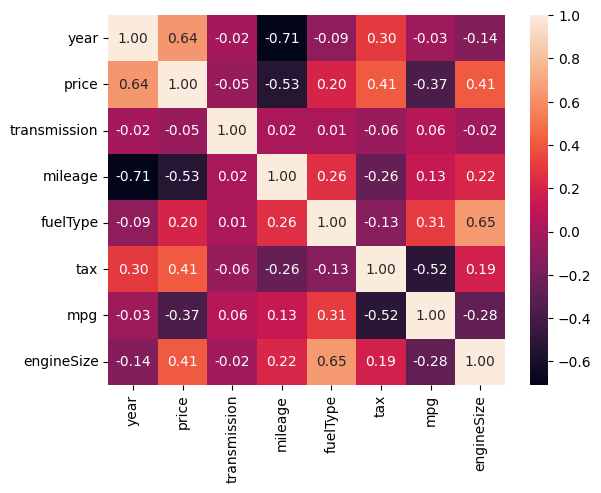

In [21]:
sns.heatmap(df2.corr(),fmt = '.2f',annot =True)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df2.drop(['price','model'],axis = 1)
y = df2['price']

In [26]:
scaler.fit(X)
standarization_x =scaler.transform(X)

In [28]:
X = standarization_x
y = df2['price']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16146, 7)
(1795, 7)
(16146,)
(1795,)


In [31]:
from xgboost import XGBRegressor
from sklearn import metrics

In [32]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [33]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [36]:
y_train_pred = xgb_model.predict(X_train)

train_score =metrics.r2_score(y_train,y_train_pred)

mse_train = metrics.mean_absolute_error(y_train,y_train_pred)

print("test_score:",train_score)
print("mean square error:",mse_train)


test_score: 0.9555408618532348
mean square error: 726.8853827998288


In [35]:
y_pred = xgb_model.predict(X_test)

test_score =metrics.r2_score(y_test,y_pred)

mse = metrics.mean_absolute_error(y_test,y_pred)

print("test_score:",test_score)
print("mean square error:",mse)


test_score: 0.9136204252189449
mean square error: 925.5200969897937


In [42]:
# predictive model
input_data = (2017,0,15944,0,150,57.7,1)

input_changed = np.array(input_data).reshape(1,-1)

std_input = scaler.transform(input_changed)



prediction = xgb_model.predict(std_input)
actual_price = 12000
print("actual price:",actual_price)
print("car price:",prediction)




actual price: 12000
car price: [11606.522]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [43]:
# predictive model
input_data = (2019,1,10460,0,145,40.3,1.5)

input_changed = np.array(input_data).reshape(1,-1)

std_input = scaler.transform(input_changed)



prediction = xgb_model.predict(std_input)
actual_price = 17500
print("actual price:",actual_price)
print("car price:",prediction)

actual price: 17500
car price: [18215.162]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
